In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [2]:
def GenerateApplicants(n, distribution = 'uniform'):
    if distribution == 'uniform':
        applicants = 2 * np.random.uniform(size = n) - 1
    elif distribution == 'normal':
        applicants = np.random.standard_normal(size=n)
    elif distribution == 'pareto':
        applicants = np.random.pareto(a = 2, size = n)
        
    return applicants

def GetMeLove(r, applicants):
    n = len(applicants)

    BestSeen = np.max(applicants[:(r-1)])

    if np.max(applicants) == BestSeen:

        Chosen = applicants[-1]
        time = n

    else:
        Chosen = applicants[(r-1):][applicants[(r-1):] > BestSeen][0]
        time = int(np.where(applicants == Chosen)[0])

    return time, Chosen

def ChanceToLove2(n):
    
    chances = np.zeros(n)
    chances[0] = 1 / n

    v1 = 1 / np.arange(1, n)
    v1 = np.cumsum(v1[::-1])[::-1]
    v2 = np.arange(1, n) / n
    print(v1)
    print(v2)

    chances[1:] = np.dot(v1,v2)
    
    return chances

def ChanceToLove(n):
    chances = [0, 1/n]

    for r in range(2, n):
        s = 0
        for i in range(r, n):
            s += (r-1) / n * (1/(i - 1))
        chances.append(s)

    return np.array(chances)

def f(x):
    return (-x * np.log(x))



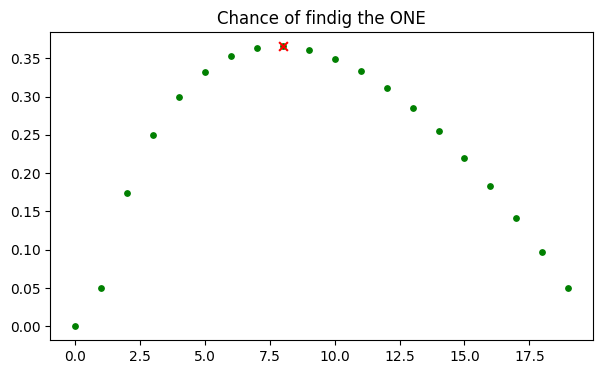

In [3]:
n = 20
int_x = np.arange(0, n)
y = ChanceToLove(n)

plt.figure(figsize=(7,4))
plt.title('Chance of findig the ONE')

plt.scatter(int_x, y, marker = '.', s = 60, color = 'green', label = 'Real distribution')
plt.scatter(int_x[y == np.max(y)], np.max(y), marker = 'x', s = 40, color = 'red', )
plt.show()

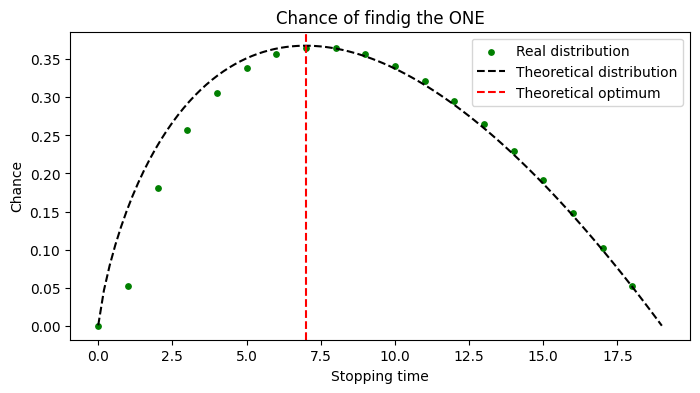

The ideal stopping time is  6.989709382257405


In [4]:
n = 19
int_x = np.arange(0, n)
y = ChanceToLove(n)
x = np.linspace(0.001, n, 100)

plt.figure(figsize=(8,4))
plt.title('Chance of findig the ONE')

plt.scatter(int_x, y, marker = '.', s = 60, color = 'green', label = 'Real distribution')
plt.plot(x, f(x / n), linestyle = 'dashed', color = 'black', label = 'Theoretical distribution')
plt.axvline(x = n / np.exp(1), color = 'r', linestyle = 'dashed', label = 'Theoretical optimum')

plt.legend(loc = 'upper right')

plt.xlabel('Stopping time')
plt.ylabel('Chance')

plt.show()
print('The ideal stopping time is ', n / np.exp(1))


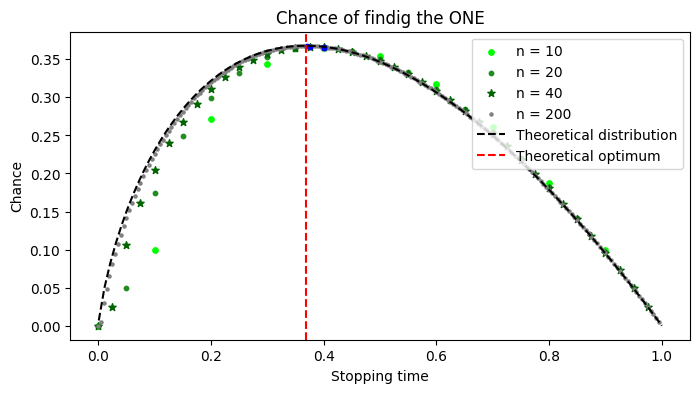

The ideal stopping time is  0.36787944117144233


In [151]:
n1 = 10
int_x1 = np.arange(0, n1) / n1
y1 = ChanceToLove(n1)

n2 = 20
int_x2 = np.arange(0, n2) / n2
y2 = ChanceToLove(n2)

n3 = 40
int_x3 = np.arange(0, n3) / n3
y3 = ChanceToLove(n3)

n4 = 200
int_x4 = np.arange(0, n4) / n4
y4 = ChanceToLove(n4)

x = np.linspace(0.001, 1, 100)

plt.figure(figsize=(8,4))
plt.title('Chance of findig the ONE')

plt.scatter(int_x1, y1, marker = '.', s = 60, color = 'lime', label = 'n = {}'.format(n1))
plt.scatter(int_x2, y2, marker = '.', s = 40, color = 'forestgreen', label = 'n = {}'.format(n2))
plt.scatter(int_x3, y3, marker = '*', s = 30, color = 'darkgreen', label = 'n = {}'.format(n3))
plt.scatter(int_x4, y4, marker = '.', s = 20, color = 'grey', label = 'n = {}'.format(n4))

plt.scatter(int_x1[y1 == np.max(y1)], np.max(y1), marker = '.', s = 40, color = 'blue', )
plt.scatter(int_x2[y2 == np.max(y2)], np.max(y2), marker = '.', s = 40, color = 'blue', )
plt.scatter(int_x3[y3 == np.max(y3)], np.max(y3), marker = '.', s = 40, color = 'blue', )
plt.scatter(int_x4[y4 == np.max(y4)], np.max(y4), marker = '.', s = 40, color = 'blue', )

plt.plot(x, f(x), linestyle = 'dashed', color = 'black', label = 'Theoretical distribution')
plt.axvline(x = 1 / np.exp(1), color = 'r', linestyle = 'dashed', label = 'Theoretical optimum')

plt.legend(loc = 'upper right')

plt.xlabel('Stopping time')
plt.ylabel('Chance')

plt.show()
print('The ideal stopping time is ', 1 / np.exp(1))

In [171]:
n = 20
r = int(np.ceil(n / np.exp(1)))
dist = 'pareto'
LoveQuality = []
Dream = []

HappyLifeCount = 0
for i in range(1000):
    applicants = GenerateApplicants(n, distribution=dist)
    Dream.append(np.max(applicants))
    _, FoundLove = GetMeLove(r, applicants)
    
    if FoundLove == np.max(applicants):
        HappyLifeCount += 1
    
    LoveQuality.append(FoundLove)


print('Estimation of succes rate: ', HappyLifeCount / 1000)
print('The theoretical optimum is: ', 1 / np.exp(1))
print('Average quality of the ONE: ', np.mean(LoveQuality))
print('Worst case: ', np.min(LoveQuality))

Estimation of succes rate:  0.38
The theoretical optimum is:  0.36787944117144233
Average quality of the ONE:  3.4622679896162425
Worst case:  0.0005287965010809526


In [172]:
dfLoveQuality = pd.DataFrame(LoveQuality, columns=['LoveQuality'])
dfLoveQuality.describe()

,LoveQuality
count,1000.000000
mean,3.462268
std,6.895658
min,0.000529
25%,0.737794
50%,1.975429
75%,3.978502
max,132.794159
